# Proyecto #1 Clustering de canciones de Spotify

## Integrantes:
* Eduardo Araya
* Martin Depix
* Diego Navia
* Eduardo Rossel

El objetivo de del proyecto es aplicar las técnicas aprendidas de Clustering para crear listas de reproducción en Spotify.  Revisemos la data disponible, en el archivo `beats.csv`

In [1]:
# Cargando las librerias requeridas

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
origData=pd.read_csv("beats.csv")
origData

,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,...,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,2Pac,1ZwdS5xdxEREPySFridCfh,1nGbXgS6toEOcFCDwEl5R3,album,2019-08-01,2019.0,day,0.656,0.882,0,...,California Love,https://p.scdn.co/mp3-preview/93e456ef0b73f23f...,1,track,spotify:track:6ayeqYtOtwVhqVB6k6MKoh,https://open.spotify.com/track/6ayeqYtOtwVhqVB...,California Love,C,major,C major
1,2Pac,1ZwdS5xdxEREPySFridCfh,1nGbXgS6toEOcFCDwEl5R3,album,2019-08-01,2019.0,day,0.810,0.642,8,...,Slippin' Into Darkness,https://p.scdn.co/mp3-preview/440595604d3f4946...,2,track,spotify:track:1UDsnzBp8gUCFsrzUDlZI9,https://open.spotify.com/track/1UDsnzBp8gUCFsr...,California Love,G#,major,G# major
2,2Pac,1ZwdS5xdxEREPySFridCfh,1nGbXgS6toEOcFCDwEl5R3,album,2019-08-01,2019.0,day,0.548,0.590,4,...,Ride or Die,https://p.scdn.co/mp3-preview/cc18dc90d609d375...,3,track,spotify:track:3bKs15o7F9VP6GBExCbb6H,https://open.spotify.com/track/3bKs15o7F9VP6GB...,California Love,E,minor,E minor
3,2Pac,1ZwdS5xdxEREPySFridCfh,1nGbXgS6toEOcFCDwEl5R3,album,2019-08-01,2019.0,day,0.839,0.657,5,...,I Ain't Mad At Cha,https://p.scdn.co/mp3-preview/d138f0170423cd9a...,4,track,spotify:track:4L0iAst3yLonw8aGxTRCvb,https://open.spotify.com/track/4L0iAst3yLonw8a...,California Love,F,minor,F minor
4,2Pac,1ZwdS5xdxEREPySFridCfh,1nGbXgS6toEOcFCDwEl5R3,album,2019-08-01,2019.0,day,0.854,0.694,0,...,Static II,https://p.scdn.co/mp3-preview/dddb7d0ea0205338...,5,track,spotify:track:66men3J5qFERvIY06M5hQ9,https://open.spotify.com/track/66men3J5qFERvIY...,California Love,C,minor,C minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447617,ZZ Top,2AM4ilv6UzW0uMRuqKtDgN,0Y9jM9umdMOH7t19urnOw4,album,1970-01-16,1970.0,day,0.673,0.520,0,...,"Neighbor, Neighbor",https://p.scdn.co/mp3-preview/530e4ce805075d4e...,6,track,spotify:track:4snfGOJDRVfY9jH43CsmJB,https://open.spotify.com/track/4snfGOJDRVfY9jH...,ZZ Top's First Album,C,major,C major
447618,ZZ Top,2AM4ilv6UzW0uMRuqKtDgN,0Y9jM9umdMOH7t19urnOw4,album,1970-01-16,1970.0,day,0.674,0.397,4,...,Certified Blues,https://p.scdn.co/mp3-preview/ee79a42629975bd9...,7,track,spotify:track:7mdPXhJBfxJBonEmqZvm9t,https://open.spotify.com/track/7mdPXhJBfxJBonE...,ZZ Top's First Album,E,minor,E minor
447619,ZZ Top,2AM4ilv6UzW0uMRuqKtDgN,0Y9jM9umdMOH7t19urnOw4,album,1970-01-16,1970.0,day,0.466,0.406,7,...,Bedroom Thang,https://p.scdn.co/mp3-preview/dd0df120d0b10f80...,8,track,spotify:track:23dC4zCpB1bnLzBxAXDLD7,https://open.spotify.com/track/23dC4zCpB1bnLzB...,ZZ Top's First Album,G,major,G major
447620,ZZ Top,2AM4ilv6UzW0uMRuqKtDgN,0Y9jM9umdMOH7t19urnOw4,album,1970-01-16,1970.0,day,0.611,0.337,0,...,Just Got Back from Baby's,https://p.scdn.co/mp3-preview/5fa536adf7c6117e...,9,track,spotify:track:7AX7qVqFljHOJC3FIQ8a6t,https://open.spotify.com/track/7AX7qVqFljHOJC3...,ZZ Top's First Album,C,major,C major


In [6]:
origData.loc[51662]

artist_name                                                           David Bowie
artist_id                                                  0oSGxfWSnnOXhD2fKuz2Gy
album_id                                                   2jUEXh8KXATTGxJHwoeQsP
album_type                                                                  album
album_release_date                                                     1997-06-09
album_release_year                                                         1997.0
album_release_date_precision                                                  day
danceability                                                                0.456
energy                                                                      0.328
key                                                                             0
loudness                                                                  -16.131
mode                                                                            1
speechiness     

La data contiene 447662 canciones de spotify, incluyendo sus detalles (artista, álbum, track), ids internos de spotify así como variables numéricas, que representan atributos (features) musicales de esta.

Por ejemplo:
- acousticness ([0-1], estima que tan *acústica* es la canción)
- danceability ([0-1], estima que tan *bailable* es la canción)
- energy ([0-1], estima la intensidad y actividad de la canción) 
- instrumentalness ([0-1], estima que tan *instrumental* es la canción)
- liveness ([0-1] estima  si la canción es en vivo o no)
- loudness ([-60,0] estima la *sonoridad* de la canción, en decibeles promedio)
- speechiness ([0-1] estima la presencia de palabras en la canción)
- valence ([0-1], estima la *positividad* de la canción)
- tempo (mide los *beats por minuto* de la canción)
- key (integer 0 a 11, el tono de la canción. 0=Do, 1=Do#, 2=Re, etc)
- mode ({0,1}: 0 = Major, 1=Minor)
- time_signature (integer 3 a 7, estima el tiempo rítmico, valor 3 significa que es 3/4)
- duration_ms (duración en milisegundos de la canción)

(Mas info: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)



In [7]:
origData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447622 entries, 0 to 447621
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   artist_name                   447622 non-null  object 
 1   artist_id                     447622 non-null  object 
 2   album_id                      447622 non-null  object 
 3   album_type                    447622 non-null  object 
 4   album_release_date            447622 non-null  object 
 5   album_release_year            447175 non-null  float64
 6   album_release_date_precision  447622 non-null  object 
 7   danceability                  447622 non-null  float64
 8   energy                        447622 non-null  float64
 9   key                           447622 non-null  int64  
 10  loudness                      447622 non-null  float64
 11  mode                          447622 non-null  int64  
 12  speechiness                   447622 non-nul

In [ ]:
pd.DataFram

In [8]:
colFeatures = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
    'loudness','speechiness','valence','tempo', 'key', 'mode', 'time_signature', 'duration_ms']
workData = origData[colFeatures]
origData[colFeatures].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,key,mode,time_signature,duration_ms
count,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,447622.000000,4.476220e+05
mean,0.698733,0.391103,0.340512,0.506068,0.221720,-18.671858,0.068922,0.337392,108.736640,5.061246,0.683420,3.727714,2.291097e+05
std,0.369360,0.183373,0.317557,0.413743,0.219318,8.640242,0.094167,0.274319,31.650459,3.491417,0.465142,0.717955,1.766587e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.066000e+03
25%,0.394000,0.252000,0.075600,0.001690,0.096800,-24.445000,0.037800,0.089400,82.391000,2.000000,0.000000,4.000000,1.234400e+05
50%,0.923000,0.370000,0.210000,0.715000,0.123000,-19.476500,0.044300,0.274000,105.723500,5.000000,1.000000,4.000000,1.949610e+05
75%,0.986000,0.514000,0.582000,0.901000,0.253000,-11.644000,0.058400,0.537000,131.051000,8.000000,1.000000,4.000000,2.715600e+05
max,0.996000,0.986000,1.000000,1.000000,1.000000,0.496000,0.971000,0.996000,244.952000,11.000000,1.000000,5.000000,4.796395e+06


# Paso 1: Selección, limpieza y preprocesamiento de features

- Decida que columnas de los datos usará para su clustering. Se sugiere usar las columnas numéricas (`origData[colFeatures]`), pero puede incluir o sacar otras columns si lo desea que no sean consideradas pertinentes para clusterizar (por ejemplo, el año de la canción, o su duración).
- Decida que filas (datos) utilizará. Puede pre-seleccionar un subconjunto de datos para el trabajo. Por ejemplo, canciones de los 90's, o canciones no-acústicas. 
- Preprocese los datos. Por ejemplo, recuerde que ciertos algoritmos necesitan que los datos estén en la misma escala, y esto no necesariamente se cumple. Podrían haber datos no válidos o outliers que quisiera sacar.

**Requisito:** Describa en la ventana siguiente las decisiones que tomó al respecto, indicando las razones para tomar esta decisión.  En las ventanas siguientes, ponga los códigos utilizados para poder reproducir el resultado final.


**Respuesta**:  <escriba aquí sus decisiones y razones>

In [9]:
# Exploración de los datos
origData.head().T

,0,1,2,3,4
artist_name,2Pac,2Pac,2Pac,2Pac,2Pac
artist_id,1ZwdS5xdxEREPySFridCfh,1ZwdS5xdxEREPySFridCfh,1ZwdS5xdxEREPySFridCfh,1ZwdS5xdxEREPySFridCfh,1ZwdS5xdxEREPySFridCfh
album_id,1nGbXgS6toEOcFCDwEl5R3,1nGbXgS6toEOcFCDwEl5R3,1nGbXgS6toEOcFCDwEl5R3,1nGbXgS6toEOcFCDwEl5R3,1nGbXgS6toEOcFCDwEl5R3
album_type,album,album,album,album,album
album_release_date,2019-08-01,2019-08-01,2019-08-01,2019-08-01,2019-08-01
album_release_year,2019.0,2019.0,2019.0,2019.0,2019.0
album_release_date_precision,day,day,day,day,day
danceability,0.656,0.81,0.548,0.839,0.854
energy,0.882,0.642,0.59,0.657,0.694
key,0,8,4,5,0


In [10]:
# Ver la cantidad de valores nulos.
print(round(origData.isnull().sum()/len(origData.artist_name)*100,2).sort_values(ascending = False).head(10))

# Eliminaremos 

track_preview_url     39.03
album_release_year     0.10
artist_name            0.00
disc_number            0.00
duration_ms            0.00
explicit               0.00
track_href             0.00
is_local               0.00
track_name             0.00
track_number           0.00
dtype: float64


In [11]:
# Exploramos algunas variables que podría ser interesante incluir
origData.explicit.value_counts()

False    442045
True       5577
Name: explicit, dtype: int64

In [12]:
round(origData.album_release_year.value_counts()*100/origData.album_release_year.value_counts().sum(),2).head(15)

2020.0    38.69
2021.0     6.05
2019.0     5.30
2017.0     4.15
2018.0     4.03
2016.0     4.02
2014.0     2.88
2015.0     2.74
2010.0     2.38
2012.0     1.99
2011.0     1.94
2009.0     1.91
2013.0     1.82
2008.0     1.61
2007.0     1.48
Name: album_release_year, dtype: float64

# Paso 2: Clustering de canciones

- Realice alguna de las técnica de clustering vistas en el curso a las canciones seleccionadas. Pruebe distintas alternativas. si es pertinente realice calibración de los parámetros (# clusters, métrica a usar, tipo de *linkage* si usa cluster jerárquicos, etc)

**Requisito**: Describa en la ventana siguiente las técnicas que probó, así como el modelo seleccionado (con sus parámetros finales). En las siguientes ventanas, ponga los códigs utilizados para poder reproducir el resultado final.  (Ojo: no necesita poner *todos* los códigos de todos los métodos que probó. Basta con aquellos relacionados con el modelo final seleccionado).

#### Lecturas interesantes

* [Common mistakes](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773)
* [PCA & K-Means](https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2)    
* [Best Practices for visualizing clusters](https://towardsdatascience.com/best-practices-for-visualizing-your-cluster-results-20a3baac7426)
* [Silhouette Explanation Video](https://www.youtube.com/watch?v=_jg1UFoef1c)
* [Silhouette Analysis - Kmeans](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
* [Discussing KMeans,Hierarchical And DBScan Clustering Algorithms](https://www.youtube.com/watch?v=461Opp1TShk)
* [Elbow vs Silhouette](https://vitalflux.com/elbow-method-silhouette-score-which-better/)

## **Respuesta**:

#### K Means testing

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
workData_std = scaler.fit_transform(workData)
workData_std = pd.DataFrame(workData_std, columns=workData.columns)

In [14]:
workData_std.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,key,mode,time_signature,duration_ms
count,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05,4.476220e+05
mean,-8.410878e-15,-3.858319e-15,4.686690e-15,5.544712e-15,9.549855e-17,-3.432443e-15,3.354449e-16,-5.953668e-16,2.393777e-15,-2.887236e-14,1.768328e-14,1.772730e-14,-7.630390e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.891745e+00,-2.132828e+00,-1.072289e+00,-1.223147e+00,-1.010953e+00,-4.783221e+00,-7.319144e-01,-1.229927e+00,-3.435551e+00,-1.449627e+00,-1.469273e+00,-5.192133e+00,-1.290873e+00
25%,-8.250328e-01,-7.585790e-01,-8.342209e-01,-1.219062e+00,-5.695839e-01,-6.681698e-01,-3.304983e-01,-9.040290e-01,-8.323946e-01,-8.767927e-01,-1.469273e+00,3.792519e-01,-5.981579e-01
50%,6.071777e-01,-1.150813e-01,-4.109890e-01,5.049793e-01,-4.501225e-01,-9.312740e-02,-2.614717e-01,-2.310890e-01,-9.520062e-02,-1.754186e-02,6.806087e-01,3.792519e-01,-1.933034e-01
75%,7.777434e-01,6.702039e-01,7.604563e-01,9.545337e-01,1.426247e-01,8.133875e-01,-1.117372e-01,7.276500e-01,7.050256e-01,8.417090e-01,6.806087e-01,3.792519e-01,2.402958e-01
max,8.048173e-01,3.244195e+00,2.076758e+00,1.193813e+00,3.548642e+00,2.218442e+00,9.579594e+00,2.400887e+00,4.303745e+00,1.700960e+00,6.806087e-01,1.772098e+00,2.585375e+01


In [19]:
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252', '#75f9f2']

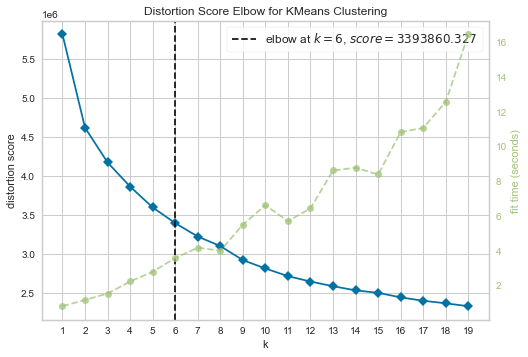

In [196]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

fig, ax = plt.subplots()

kmeans = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')

visualizer = KElbowVisualizer(kmeans, k=(1,20),ax=ax)
visualizer.fit(workData_std)

ax.set_xticks(range(1,20))
visualizer.show()
plt.show()

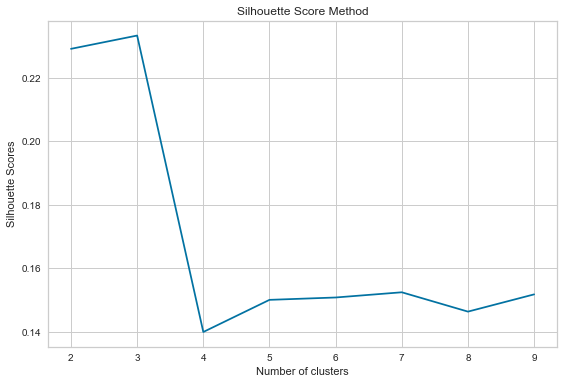

--- 22628.286869049072 seconds ---


In [17]:
import time
from sklearn.metrics import silhouette_score

start_time = time.time()
silhouette_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', #
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(workData_std)
    silhouette_scores.append(silhouette_score(workData_std, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 10), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 10))
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

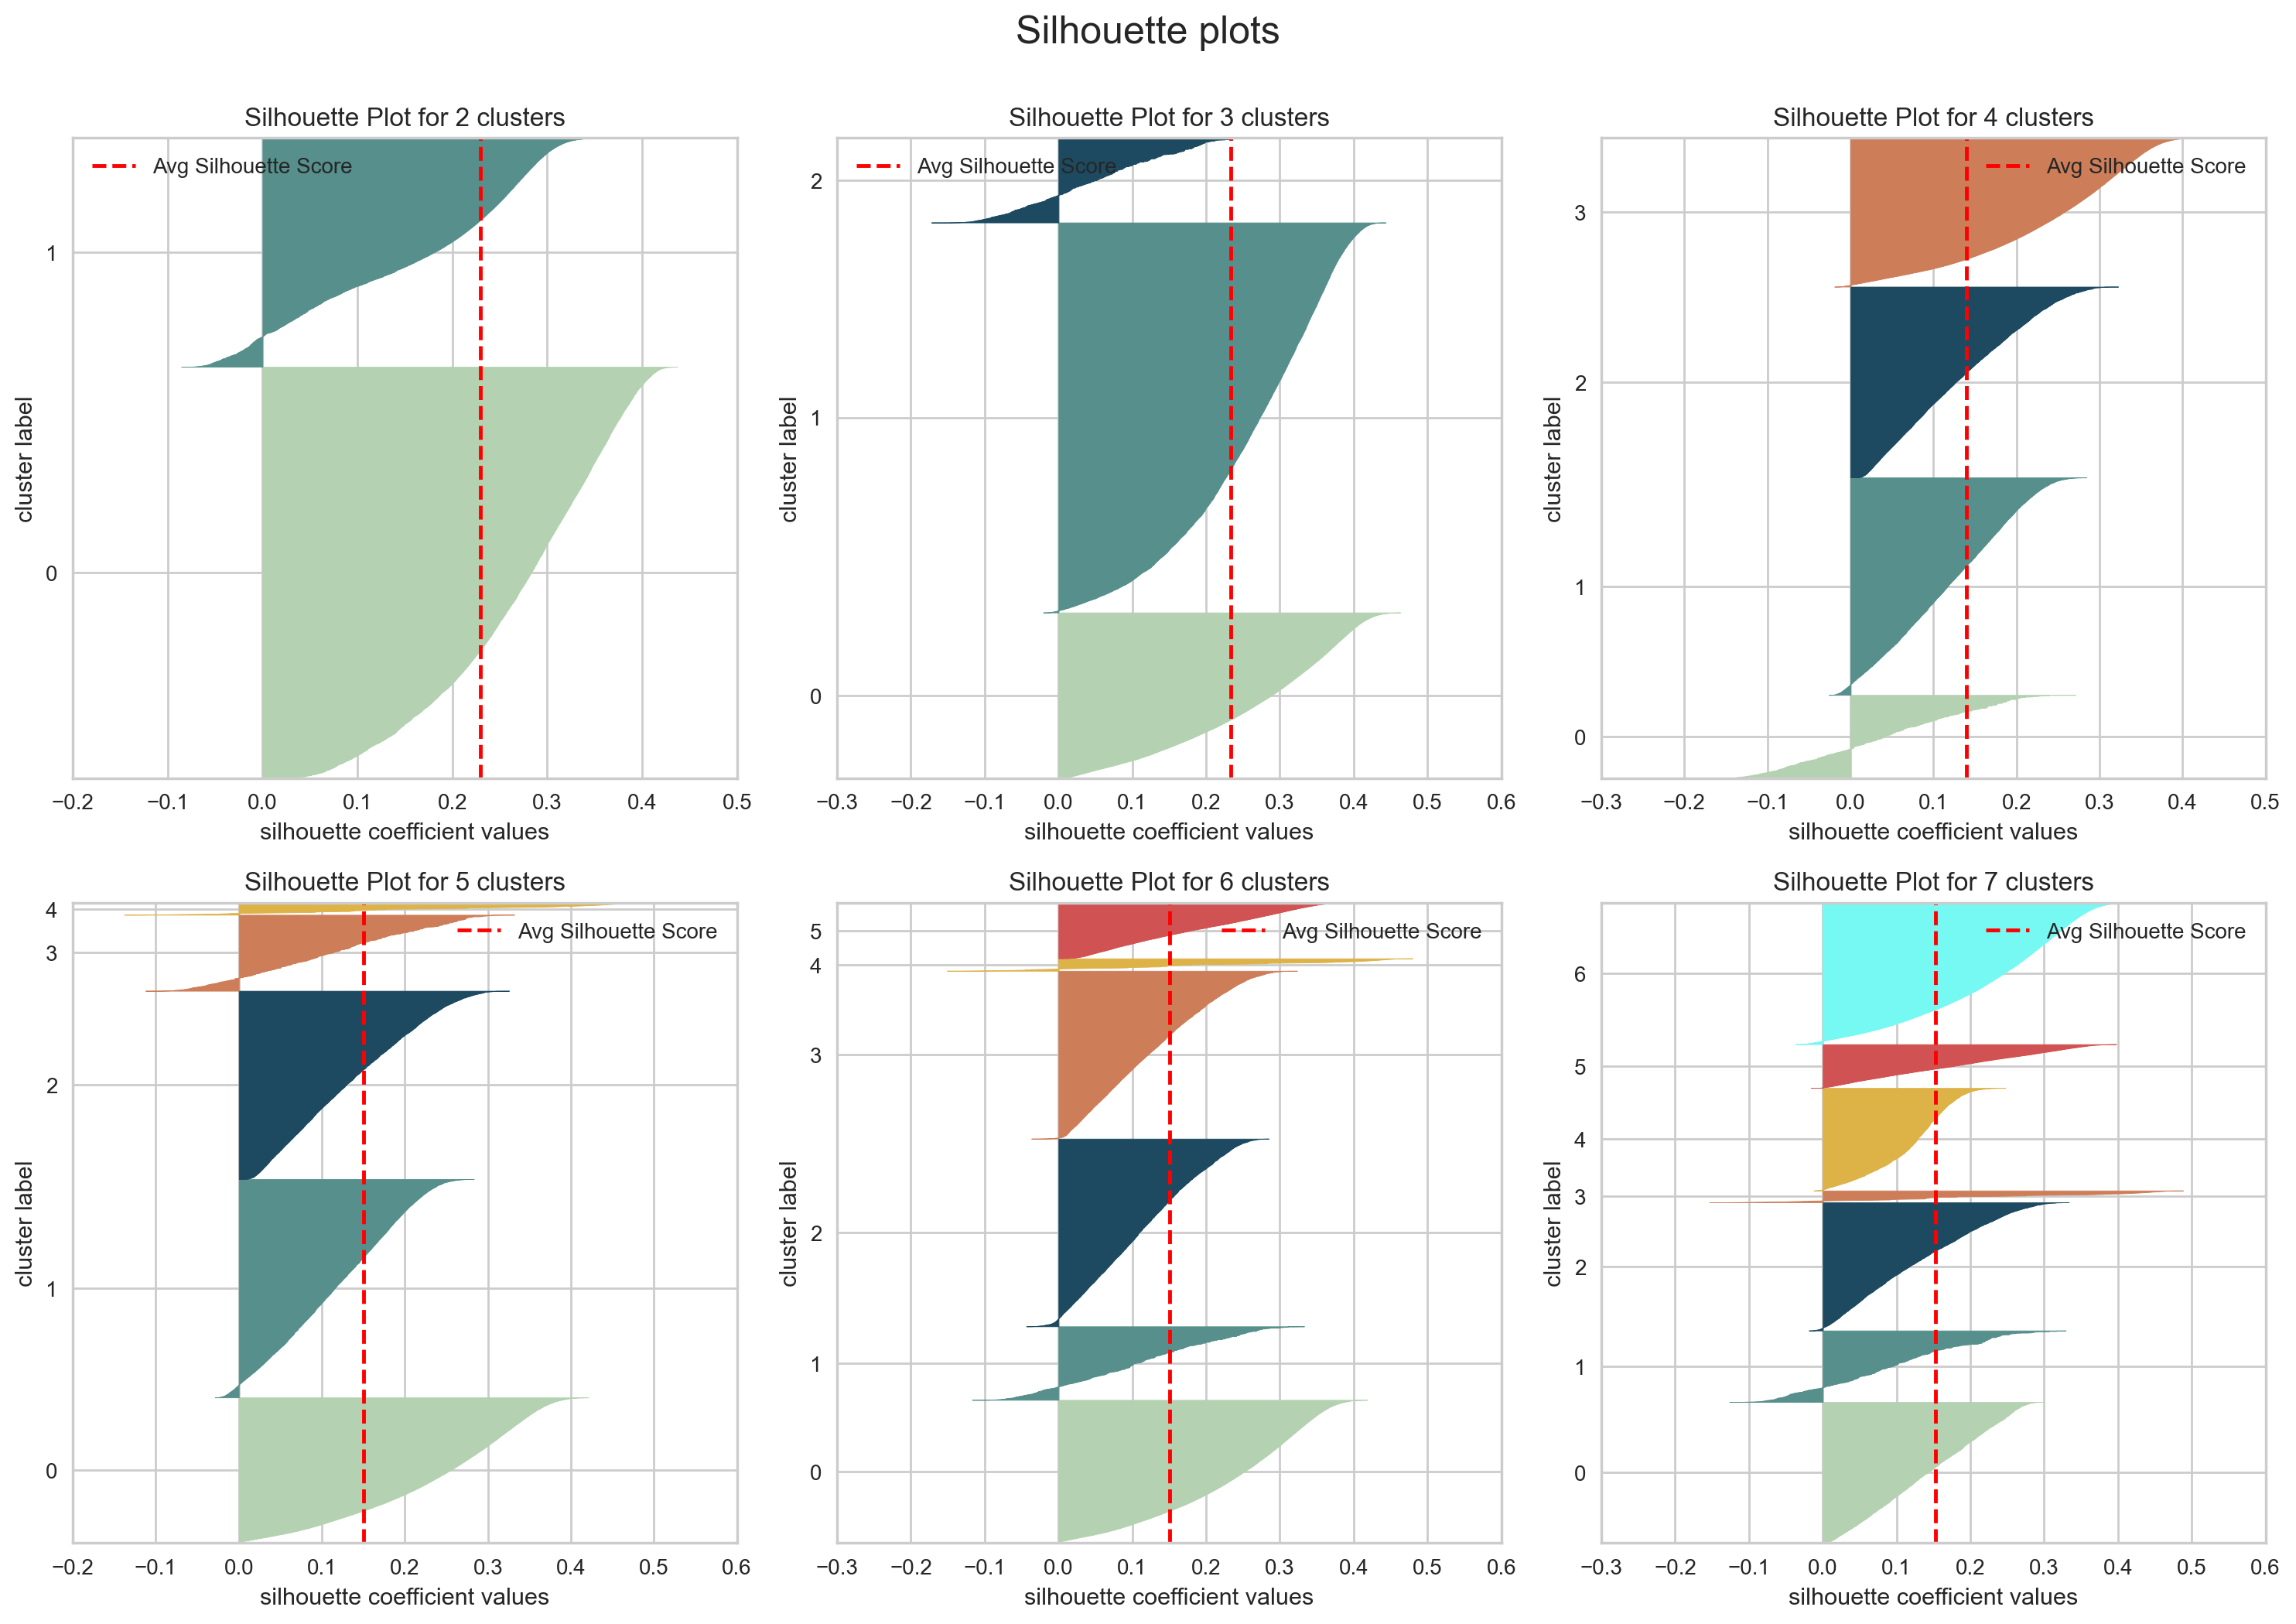

--- 52299.47020864487 seconds ---


In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.ticker as ticker

def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)
    
    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax


start_time = time.time()

# Plot for multiple ks
k_max = 7
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    # Apply clustering for k clusters
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')

    km_fit = km.fit(workData_std)
    
    # create chart
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(workData_std, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [22]:
# Final decision

cluster_choice = 6

km = KMeans(n_clusters= cluster_choice, 
            max_iter=300, 
            tol=1e-04, 
            init='k-means++', 
            n_init=10, 
            random_state=42, 
            algorithm='auto')

km_fit = km.fit(workData_std)

In [26]:
#!pip install data-science-utils

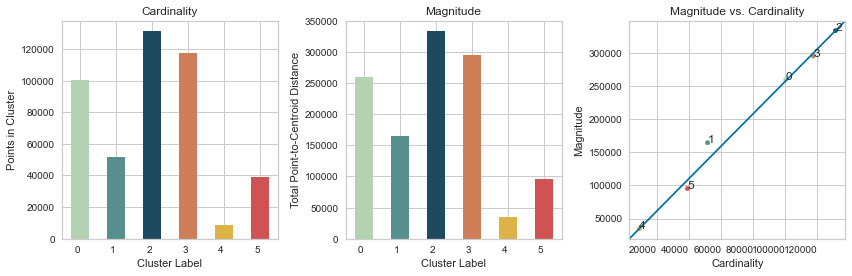

In [25]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(km_fit.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(workData_std,
                       km_fit.labels_,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(workData_std,
                              km_fit.labels_,
                              km_fit.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:km_fit.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

The cluster cardinality, or the cluster sizes, plot shows the number of points per cluster. You can use this chart to see if some clusters contain significantly fewer or more data points than the other clusters. In our example, the distribution of the data points per cluster looks ok.  

The cluster magnitude plot shows the total point to centroid distance per cluster. This chart can be used to see how high is the ‘spread’ of the points in each cluster and if there are any clumpy or wide clusters.  

The Cardinality vs Magnitude plot compares cluster cardinality with cluster magnitude. Clusters with a higher cardinality tend to also have a higher cluster magnitude. The idea is that normal clusters lie on or are very close to the 45-degree line. Anomalies tend to lie more distant from it. In our example cluster 1 is anomalous.

#### DBSCAN

* [Determing optimal value of epsilon](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc)

In [198]:
## Otros metodos
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

## Metricas de performance en clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [201]:
## Numero de vecinos
n_vecinos = 10

## Instancia del modelo
neighbors_model = NearestNeighbors(n_neighbors=n_vecinos)

## Ajuste del modelo
neighbors_model = neighbors_model.fit(workData_std)

## Computar de los n vecinos más cercano y los indices de las muestras vecinos
distancias, indices = neighbors_model.kneighbors(workData_std)

## Reservamos la distancia maxima del vecino cercano para cada punto y los ordenamos
distancias = distancias.max(axis=1)
distancias.sort()

## Agrupemos la informacion en un dataframe
reporte = pd.DataFrame({'i-esimo punto': range(1, len(distancias)+1),
                    'distancia': distancias})
reporte

,i-esimo punto,distancia
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
...,...,...
447617,447618,5.173938
447618,447619,5.363895
447619,447620,5.418162
447620,447621,6.445687


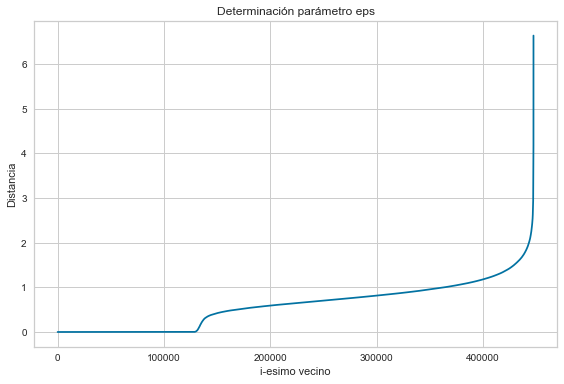

In [204]:
fig, ax = plt.subplots()
ax.plot(reporte['i-esimo punto'], reporte.distancia)
ax.set_title('Determinación parámetro eps')
ax.set_xlabel('i-esimo vecino')
ax.set_ylabel('Distancia')
plt.tight_layout()
plt.show()

In [218]:
len(workData_std.columns)

13

#### Minimum Samples (“MinPts”)
There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:
* The larger the data set, the larger the value of MinPts should be
* If the data set is noisier, choose a larger value of MinPts
* Generally, MinPts should be greater than or equal to the dimensionality of the data set
* For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
* If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

In [263]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.9, min_samples=2*len(workData_std.columns))
dbscan.fit(workData_std)

DBSCAN(eps=1.9, min_samples=26)

In [264]:
clusters_dbscan = dbscan.labels_
pd.DataFrame(clusters_dbscan, columns=['cluster_label_dbscan'])

,cluster_label_dbscan
0,0
1,0
2,1
3,1
4,1
...,...
447617,0
447618,1
447619,0
447620,0


In [265]:
df_labels_dbscan = pd.concat([df_labels[['x_pca','y_pca']], 
                              pd.DataFrame(clusters_dbscan,columns=['cluster_dbscan'])], axis = 1)
df_labels_dbscan

,x_pca,y_pca,cluster_dbscan
0,3.964456,0.692467,0
1,3.473307,-0.607142,0
2,2.706297,1.309676,1
3,3.734484,0.117224,1
4,3.686534,-1.248808,1
...,...,...,...
447617,2.476121,-2.283403,0
447618,2.101151,-1.448025,1
447619,1.384588,-1.224220,0
447620,1.536722,-0.725388,0


In [266]:
df_labels_dbscan.cluster_dbscan.unique()

array([ 0,  1, -1,  2,  3,  5,  4,  7,  6,  9,  8, 10, 33, 19, 11, 21, 12,
       13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 29, 28, 30, 31,
       32])

In [267]:
df_labels_dbscan_no_noise = df_labels_dbscan[df_labels_dbscan.cluster_dbscan != -1]

<ipython-input-268-83d7a5b50210>:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
<ipython-input-268-83d7a5b50210>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


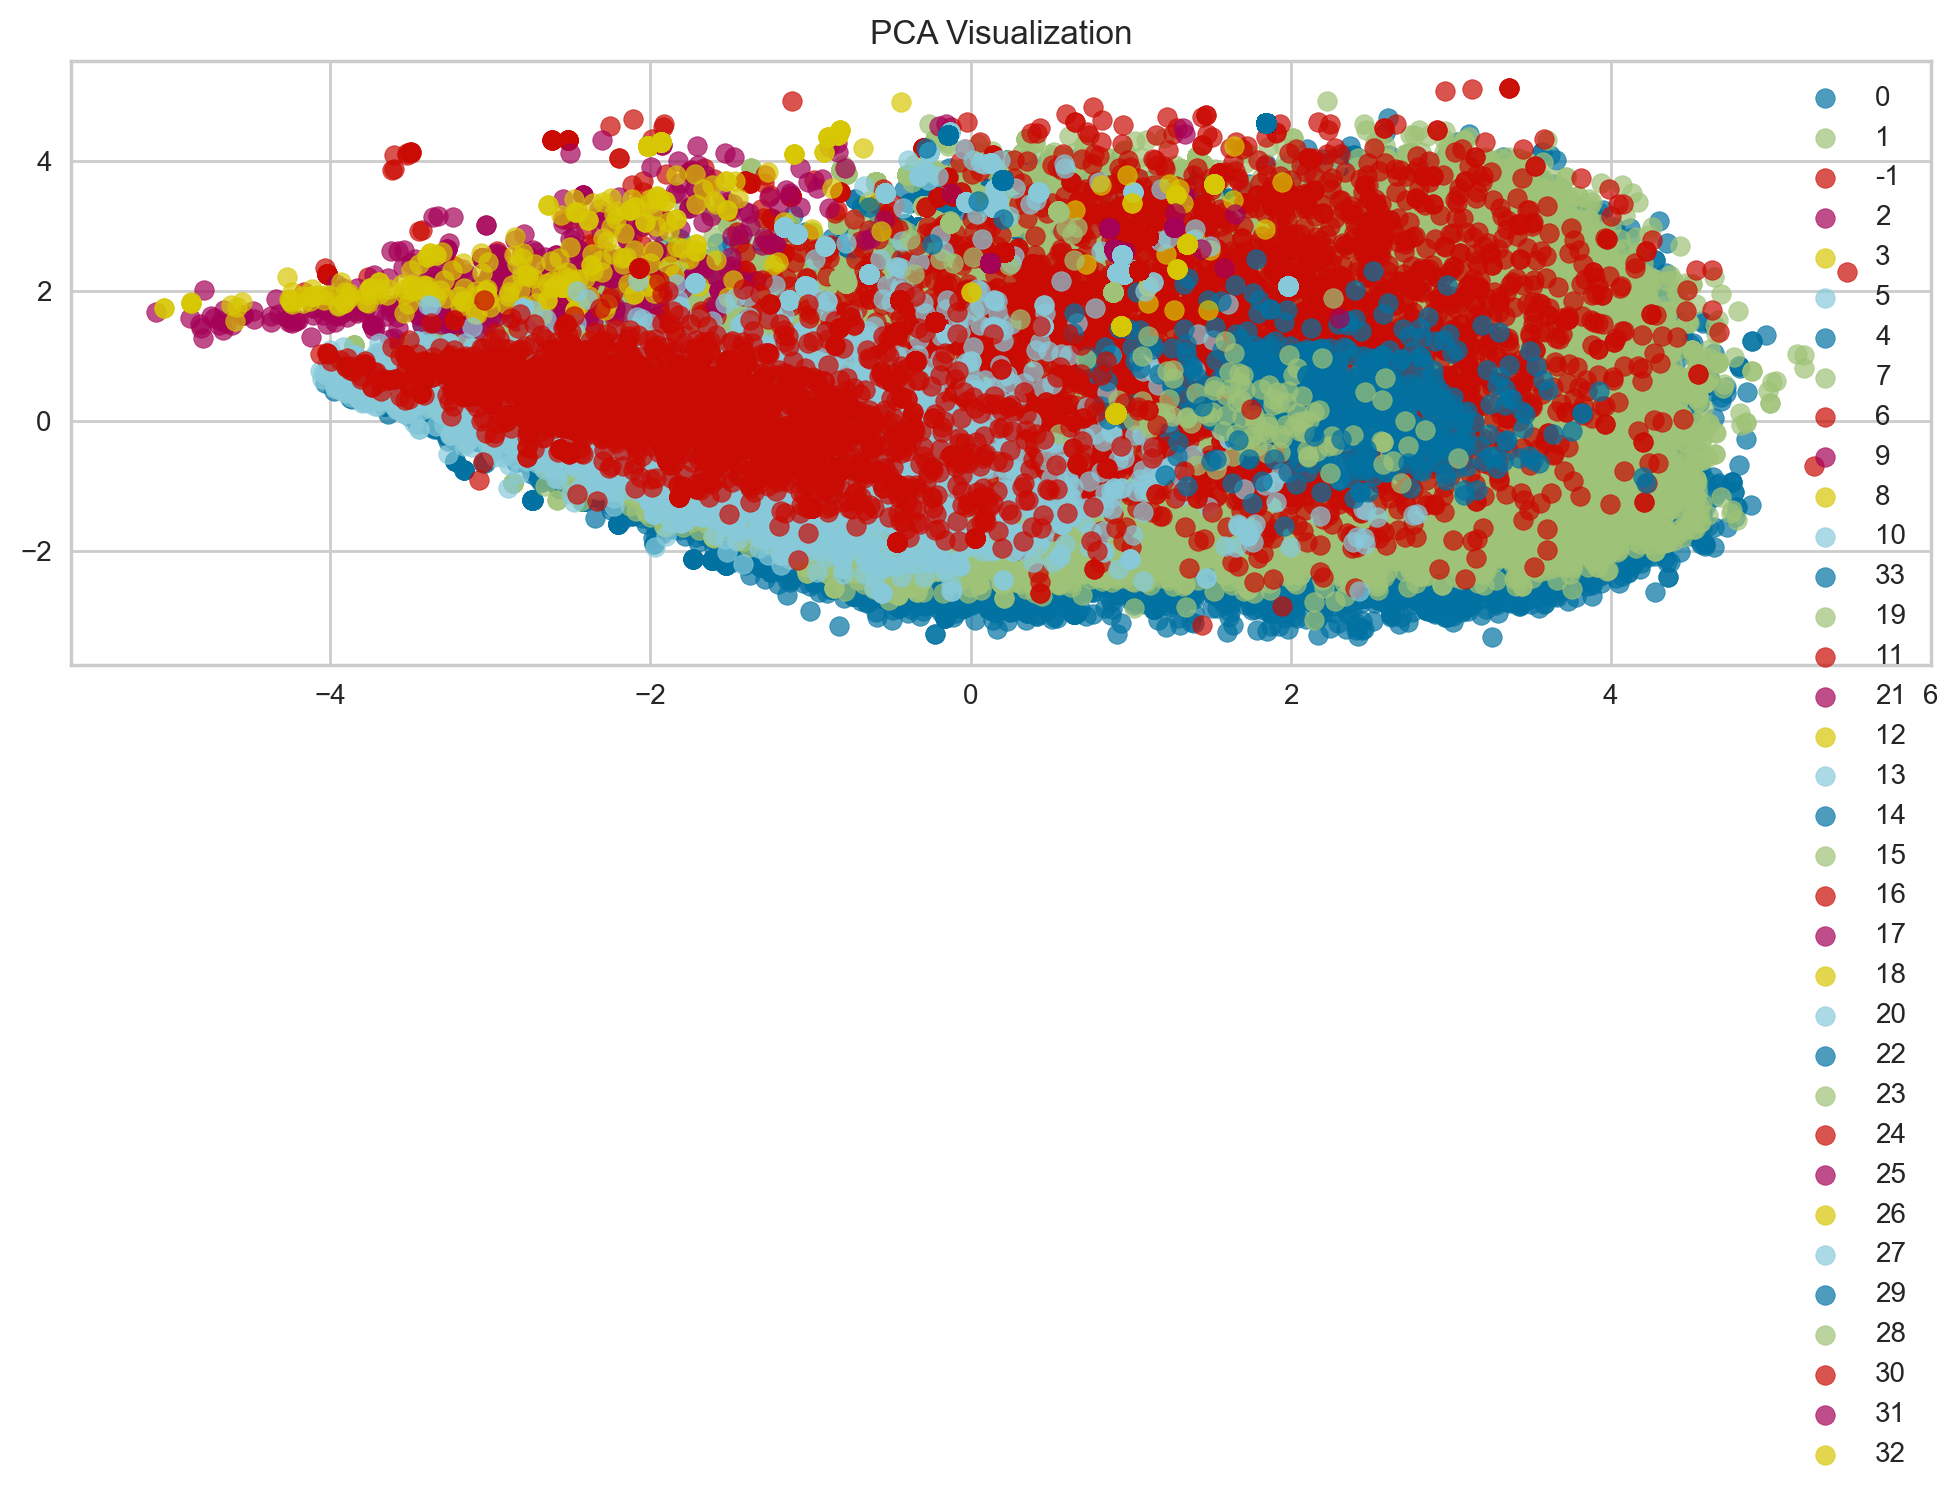

In [268]:
# Visualizing pca and pacmap
from sklearn.decomposition import PCA

fig, ax1 = plt.subplots(figsize=(12,4), dpi=200)

for l in df_labels_dbscan.cluster_dbscan.unique():
    ax1.scatter(df_labels_dbscan[df_labels_dbscan.cluster_dbscan == l].loc[:,'x_pca'],
                df_labels_dbscan[df_labels_dbscan.cluster_dbscan == l].loc[:,'y_pca'],
                alpha = 0.7,
                label = l)

ax1.set_title("PCA Visualization")
ax1.legend()
plt.tight_layout()
plt.show()

<ipython-input-269-5e3231b2d099>:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
<ipython-input-269-5e3231b2d099>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


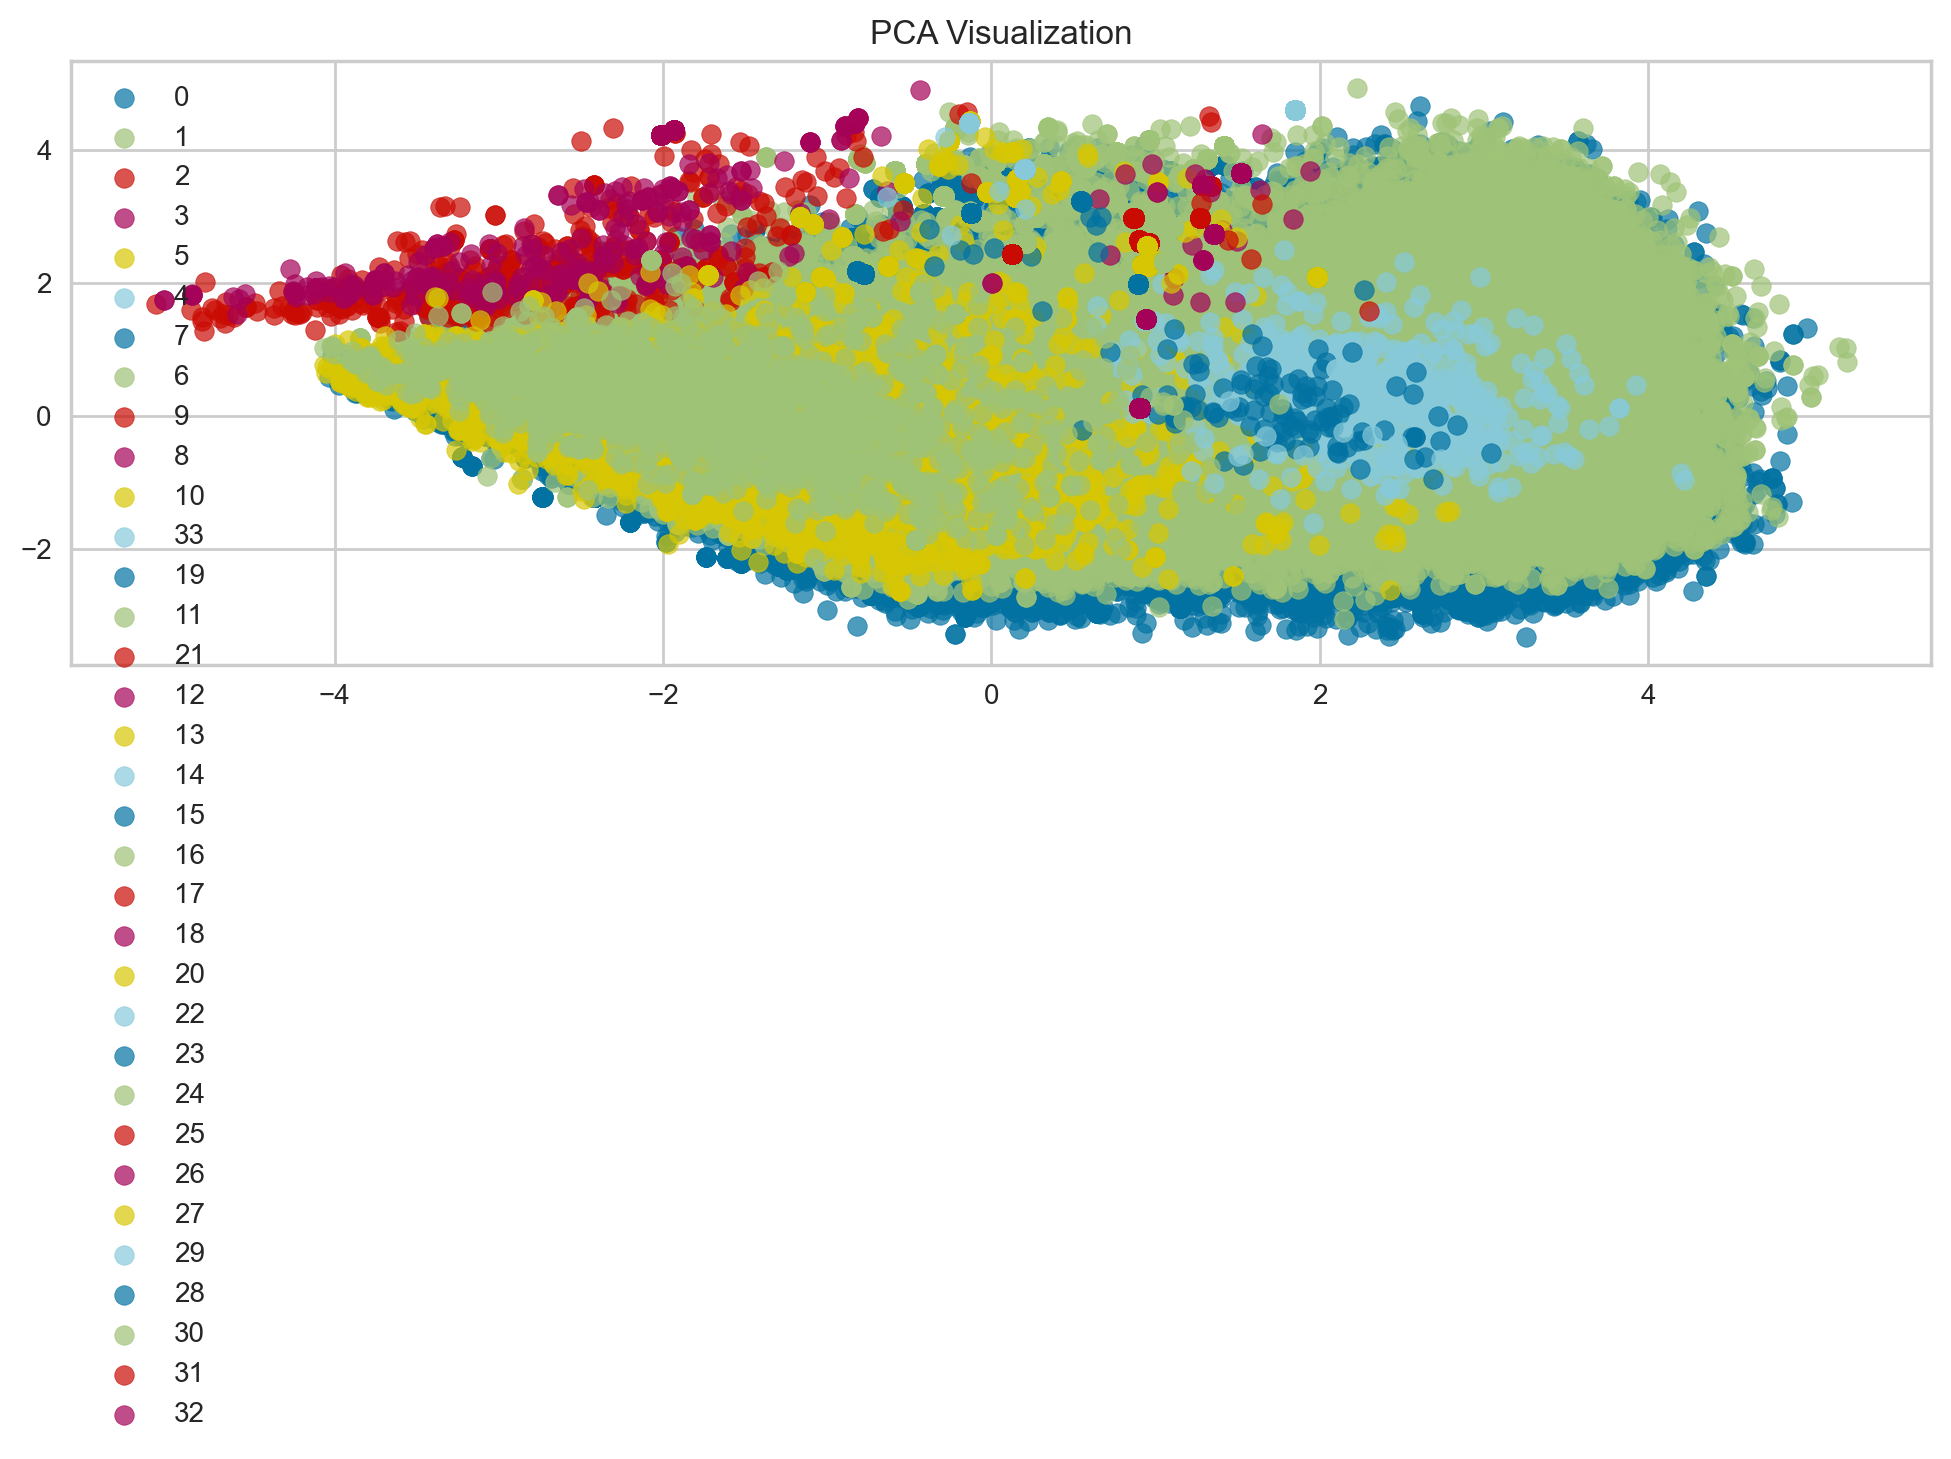

In [269]:
# Visualizing pca and pacmap
from sklearn.decomposition import PCA

fig, ax1 = plt.subplots(figsize=(12,4), dpi=200)

for l in df_labels_dbscan_no_noise.cluster_dbscan.unique():
    ax1.scatter(df_labels_dbscan_no_noise[df_labels_dbscan_no_noise.cluster_dbscan == l].loc[:,'x_pca'],
                df_labels_dbscan_no_noise[df_labels_dbscan_no_noise.cluster_dbscan == l].loc[:,'y_pca'],
                alpha = 0.7,
                label = l)

ax1.set_title("PCA Visualization")
ax1.legend()
plt.tight_layout()
plt.show()

#### Gaussian

In [270]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
### Buscar el mejor número de clusters 

start_time = time.time()

report_model = {'k': [], 'BIC': [], 'silhouette': [], 'Davies-Bouldin': []}

## Numero de cluster
max_clusters=30

for n_clusters in range(2, max_clusters):

    ## Instancia del modelo
    model = GaussianMixture(n_components=n_clusters, 
                            covariance_type="full")

    ## Ajuste dle modelo
    model.fit(workData_std)
    prediccion = model.predict(workData_std)
    
    ## Almacenar metricas
    report_model['k'].append(n_clusters)
    report_model['BIC'].append( model.bic(workData_std) )
    report_model['silhouette'].append( silhouette_score(X=workData_std, 
                                                       labels=prediccion, 
                                                       metric='euclidean') )
    report_model['Davies-Bouldin'].append( davies_bouldin_score(X=workData_std, 
                                                               labels=prediccion) )

## Convertir el reporte a dataframe
report_model = DataFrame(report_model)
report_model


print("--- %s seconds ---" % (time.time() - start_time))

/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.


In [ ]:
## Grafica de las metricas
plt.figure(figsize=(16, 5))
plt.plot(report_model['k'], report_model['silhouette'], 'ro-', label='silhoutte')
plt.plot(report_model['k'], report_model['Davies-Bouldin'], 'bo-', label='Davies-Bouldin')
plt.xlabel('k'); 
plt.ylabel('metric-score'); 
plt.legend(); 
plt.grid()
plt.tight_layout(); 
plt.show()

## Paso 3: Interpretación de los clusters obtenidos
- Intente comprender los clusters obtenidos. Utilice las técnicas vistas en el curso (análisis de medias, PCA, etc) para analizar los clusters, intentando interpretar el por qué de la clusterización que obtuvo.

**Requisito**: Describa en la ventana siguiente los análisis que hizo, así como la conclusión a la que llegó.  Incluya en la ventana siguiente los códigos finales utilizados para llegar a esta conclusión.


#### K Means

In [63]:
df_labels = pd.concat([pd.DataFrame(X_std_pca),pd.DataFrame(km_fit.labels_)], axis = 1)
df_labels.columns = ['x_pca','y_pca','labels']
df_labels

,x_pca,y_pca,labels
0,3.964456,0.692467,0
1,3.473307,-0.607142,0
2,2.706297,1.309676,4
3,3.734484,0.117224,0
4,3.686534,-1.248808,0
...,...,...,...
447617,2.476121,-2.283403,0
447618,2.101151,-1.448025,0
447619,1.384588,-1.224220,0
447620,1.536722,-0.725388,0


In [68]:
df_labels[df_labels.labels == 0].loc[:,'y_pca']

0         0.692467
1        -0.607142
3         0.117224
4        -1.248808
5        -0.119337
            ...   
447617   -2.283403
447618   -1.448025
447619   -1.224220
447620   -0.725388
447621   -0.588701
Name: y_pca, Length: 100133, dtype: float64

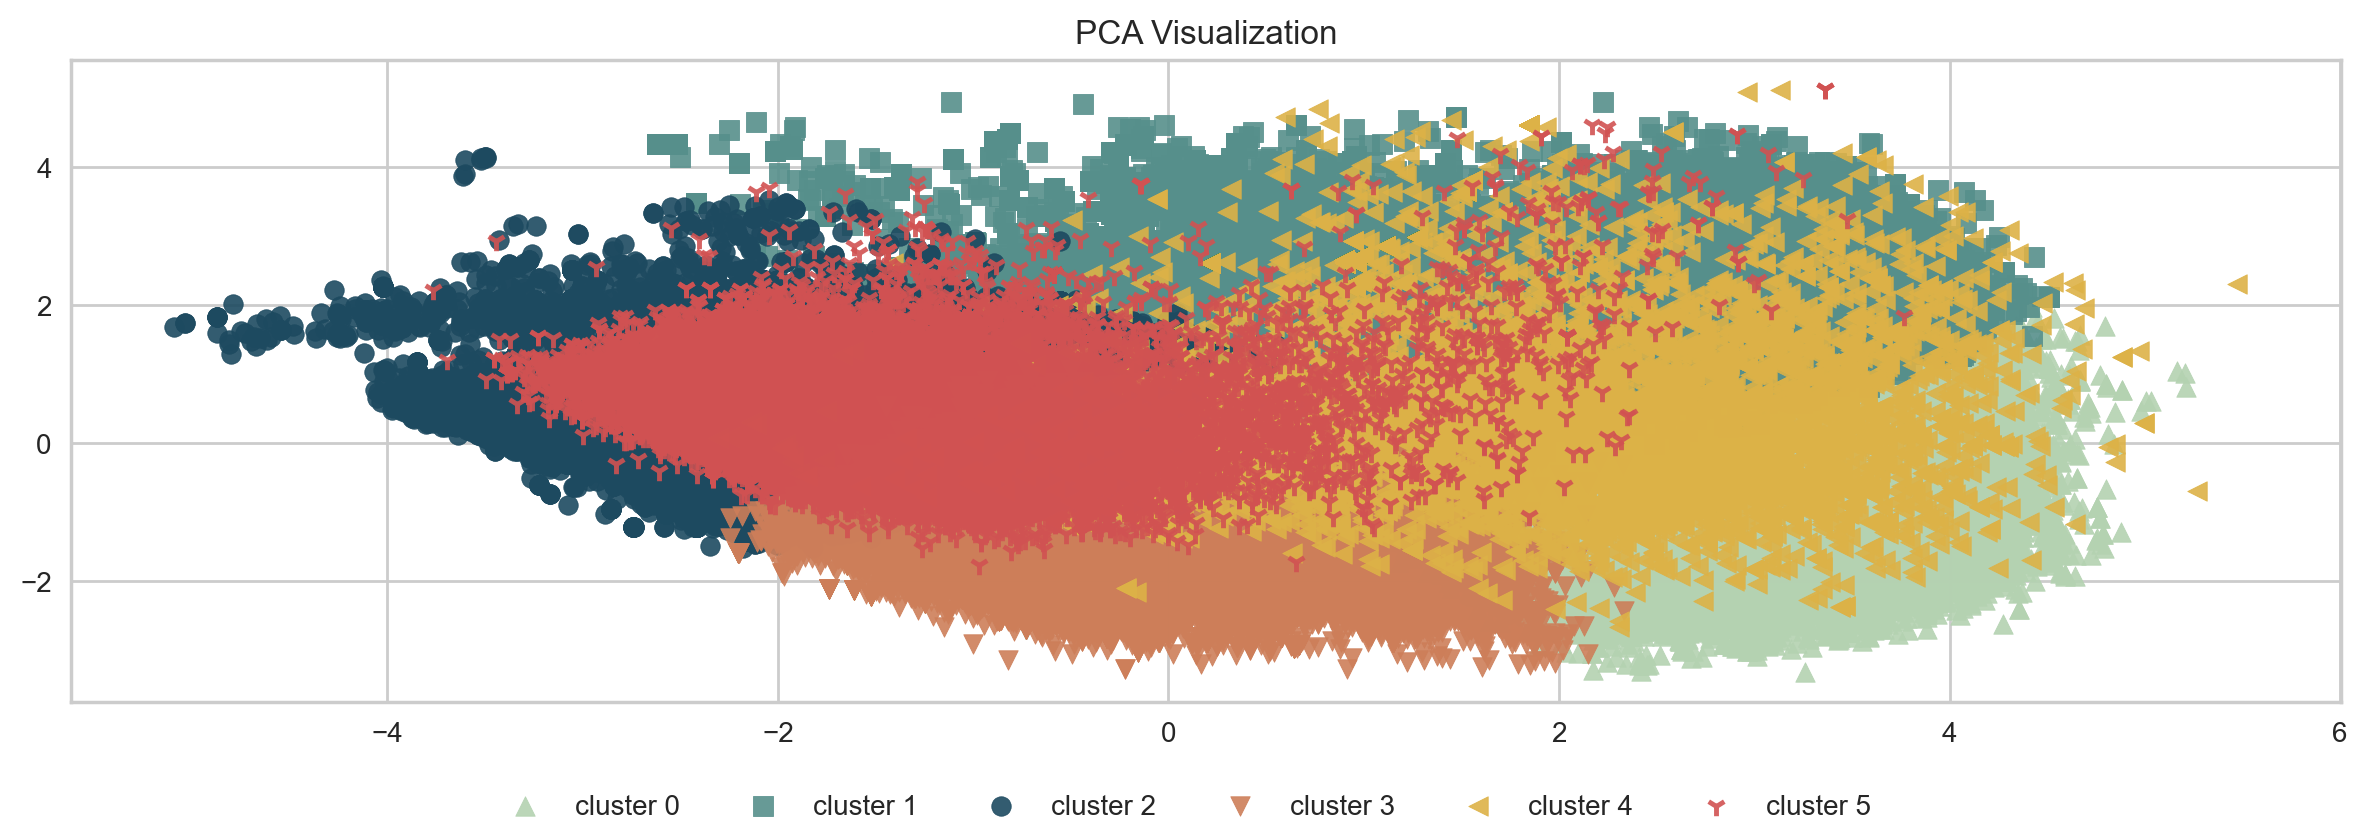

In [70]:
# Visualizing pca and pacmap
from sklearn.decomposition import PCA

fig, ax1 = plt.subplots(figsize=(12,4), dpi=200)

# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_std_pca = pca_scaled_std.fit_transform(workData_std)

for l, c, m in zip(range(0, 6), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o','v','<','1')):
    ax1.scatter(df_labels[df_labels.labels == l].loc[:,'x_pca'],
                df_labels[df_labels.labels == l].loc[:,'y_pca'],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

ax1.set_title("PCA Visualization")
labels = np.unique(km_fit.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels), bbox_transform=(1,0),borderaxespad=-0.5)
plt.tight_layout()
plt.show()

In [91]:
workData_std_labeled = pd.concat([workData_std,pd.DataFrame(km_fit.labels_, columns=['cluster'])],axis = 1)

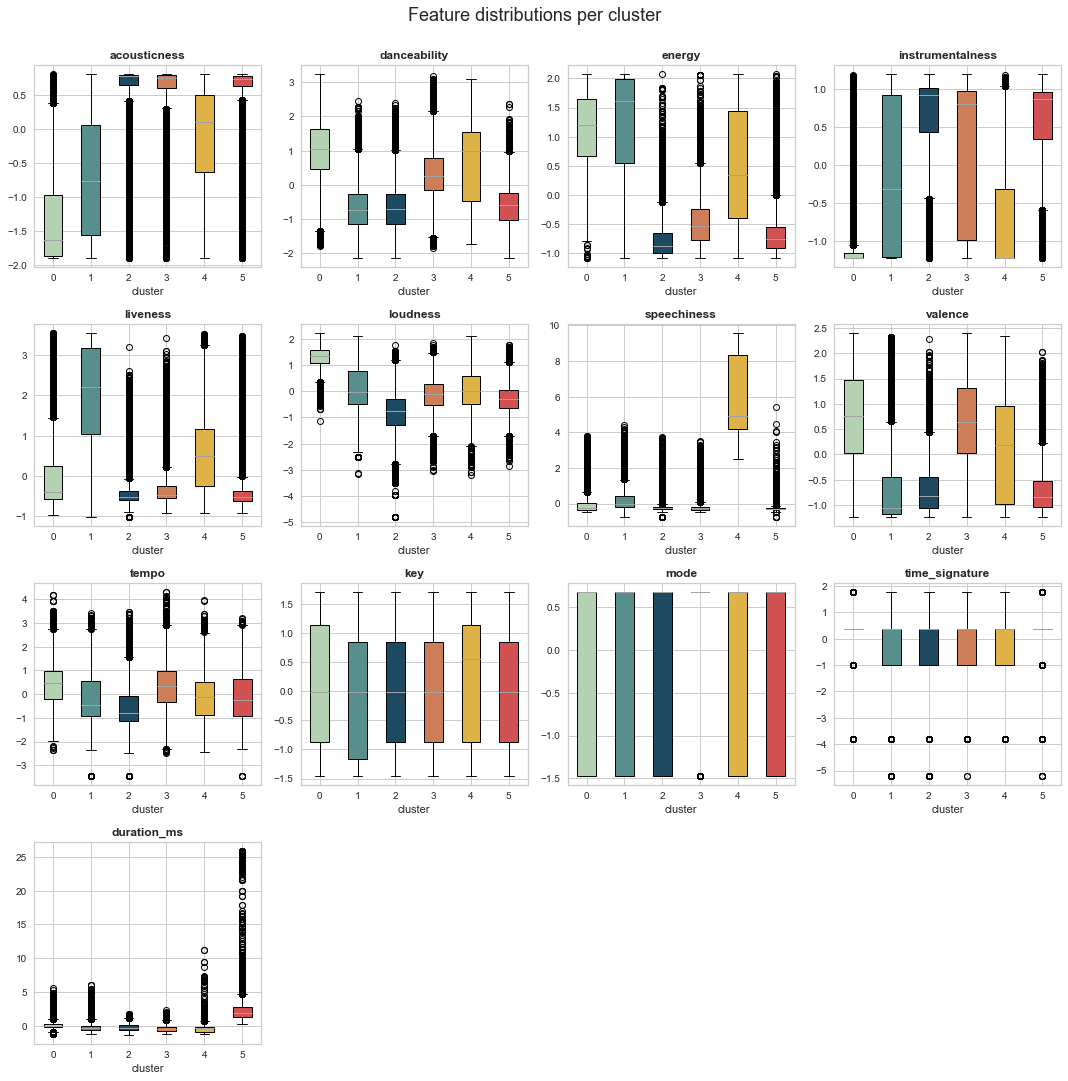

In [92]:
workData_std_labeled = pd.concat([workData_std,pd.DataFrame(km_fit.labels_, columns=['cluster'])],axis = 1)

features = workData_std.columns
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = workData_std_labeled[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()

In [94]:
origData.loc[:,['artist_name','track_name']]

,artist_name,track_name
0,2Pac,California Love
1,2Pac,Slippin' Into Darkness
2,2Pac,Ride or Die
3,2Pac,I Ain't Mad At Cha
4,2Pac,Static II
...,...,...
447617,ZZ Top,"Neighbor, Neighbor"
447618,ZZ Top,Certified Blues
447619,ZZ Top,Bedroom Thang
447620,ZZ Top,Just Got Back from Baby's


In [96]:
workData_std_labeled_names = pd.concat([origData.loc[:,['artist_name','track_name']],workData_std_labeled], axis=1)

In [102]:
workData_std_labeled_names[workData_std_labeled_names.cluster == 2].sample(20)

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,key,mode,time_signature,duration_ms,cluster
143643,Johann Sebastian Bach,"Brandenburg Concerto No.2 in F, BWV 1047: 2. A...",-0.034474,-0.687685,-0.819735,-1.202385,-0.651657,-0.554400,-0.250852,-0.548238,0.253120,-0.876793,-1.469273,0.379252,-0.111949,2
323896,Patrick Doyle,Blow Blow,0.680277,-0.104175,-0.984430,-1.223121,-0.648921,-0.541321,-0.240233,-0.810707,-1.503918,1.414543,0.680609,1.772098,-0.472418,2
309294,Mother Nature Sound FX,Ages Away,0.303950,-1.249382,-1.052450,0.589573,-0.504838,-1.805871,-0.108551,-1.124575,-1.251409,-1.449627,0.680609,1.772098,0.208823,2
256593,Mother Nature Sound FX,Take A Walk In Nature,0.382464,-0.458644,-0.401542,-1.013354,-0.377169,-0.481138,-0.164835,-0.934286,0.579087,-0.876793,0.680609,-3.799287,-0.566436,2
106669,Frédéric Chopin,"12 Études, Op. 25: No .7 in C-Sharp Minor",0.802110,0.021253,-0.760218,0.973869,-0.500278,-0.520026,-0.333684,-1.026150,0.480890,-1.163210,-1.469273,1.772098,0.496383,2
49629,David Arkenstone,Sanctus,-0.440583,-0.229602,-0.225195,0.217361,-0.472920,0.551473,-0.406959,-0.555529,-0.502320,-0.876793,-1.469273,0.379252,0.425359,2
83461,Frédéric Chopin,"12 Etudes, Op.25: No.11 In A Minor ""Winter Wind""",0.731718,-0.344123,0.048772,0.959368,-0.386288,0.369071,-0.314569,-0.962355,0.281366,-1.449627,0.680609,0.379252,-0.038660,2
88806,Frédéric Chopin,"3 Nocturnes, Op. 15: No. 1 in F Major",0.799403,-0.720405,-0.955144,0.940032,-0.617916,-0.155684,-0.345366,-0.828934,-1.200099,-0.017542,0.680609,0.379252,0.244371,2
167173,Johann Sebastian Bach,"4 Duets: No. 4 in A Minor, BWV 805",0.520541,-1.238476,-0.735341,0.971452,-0.523076,-0.354521,-0.325189,-0.347742,-1.330808,1.128126,-1.469273,0.379252,-0.215199,2
445971,Yann Tiersen,Monochrome (feat. Gruff Rhys) - Portrait Version,0.076529,-0.458644,-0.562143,-1.216838,-0.575055,0.076370,-0.393153,-0.712281,-0.052468,1.128126,-1.469273,-1.013594,0.033643,2


## Paso 4: Selección de playlist
- Escoga una canción de la lista, a partir de la cual le gustaría hacer una playlist.
- Vea el cluster asociado a esa canción, y seleccione otras canciones del mismo clusters, para crear una playlist de ~3 horas de duración. Para esto último, utilice el campo `duration_ms` que indica la duración de la canción.
- Escriba la lista de canciones seleccionadas, indicando su título y artista/grupo.

**Requisito**: Indique la canción seleccionada, así como la lista generada. Agregue después lo códigos utilizados para esto.

**Respuesta**: <>

In [103]:
origData.loc[445971,:]

artist_name                                                          Yann Tiersen
artist_id                                                  00sazWvoTLOqg5MFwC68Um
album_id                                                   7GUrwrIXIwoYh6t3WHEBeW
album_type                                                                  album
album_release_date                                                     2019-12-06
album_release_year                                                         2019.0
album_release_date_precision                                                  day
danceability                                                                0.307
energy                                                                      0.162
key                                                                             9
loudness                                                                  -18.012
mode                                                                            0
speechiness     

In [105]:
# Selección de canciones de la lista asociada al cluster
clusters = km_fit.labels_
clusterCancion = clusters[445971]
cancionesCluster = (origData[clusters == clusterCancion])

In [109]:
cancionesCluster.sample(20)

,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,...,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
245114,Max Richter,2VZNmg4vCnew4Pavo8zDdW,09x25TUKcHtSYTDNNFQGHZ,album,2012-09-25,2012.0,day,0.166,0.04360,7,...,He Won't Open the Door,https://p.scdn.co/mp3-preview/92d0c4d9bdf69e4d...,6,track,spotify:track:3nUIwjo1ho55GWR2YClI8K,https://open.spotify.com/track/3nUIwjo1ho55GWR...,Lore,G,major,G major
258134,Mother Nature Sound FX,4lrOh2SR7H3guHky2lAYOk,4DPOGUujMo5rwnemxXvFhL,album,2021-02-25,2021.0,day,0.115,0.00178,6,...,Contemplations,https://p.scdn.co/mp3-preview/70e9d2d623249224...,33,track,spotify:track:6MOAONUngt39vVLtSn6Y7V,https://open.spotify.com/track/6MOAONUngt39vVL...,Mother Nature | Yoga,F#,major,F# major
376130,Sergei Rachmaninoff,0Kekt6CKSo0m5mivKcoH51,2LFInxWGmE78xU7ETxqNb9,album,1919,1919.0,year,0.263,0.11100,8,...,"Lilacs, Op. 21/5",https://p.scdn.co/mp3-preview/6039fcfd3e2c955a...,15,track,spotify:track:1Hyw6x2oVy2pDztMCiE0aY,https://open.spotify.com/track/1Hyw6x2oVy2pDzt...,Sergei Rachmaninoff: Complete RCA Recordings,G#,major,G# major
220179,Ludwig van Beethoven,2wOqMjp9TyABvtHdOSOTUS,5GISuKNCfAqdSmJZB2rRf7,album,2020-06-09,2020.0,day,0.208,0.00752,0,...,"Sonata for Cello and Piano No. 4 in C Major, O...",NaN,217,track,spotify:track:23bMUhOjoHndfjEV0uceXJ,https://open.spotify.com/track/23bMUhOjoHndfjE...,Summer Classical: Beethoven,C,major,C major
352259,Relaxmycat,4E2ZuPctdHq0Is69axw1n6,35aFYe2pirf5flVP7crMAM,album,2020-09-26,2020.0,day,0.242,0.00852,8,...,Peaceful Waves,https://p.scdn.co/mp3-preview/7988ec05a9bec25d...,27,track,spotify:track:2czZAABKLKlRTaZk14jqD1,https://open.spotify.com/track/2czZAABKLKlRTaZ...,Essential Relaxation Tracks,G#,major,G# major
75923,Frédéric Chopin,7y97mc3bZRFXzT2szRM4L4,1HWdPT45m2X78Ol2WwAfJx,album,2020-11-01,2020.0,day,0.400,0.01220,9,...,"24 Préludes, Op. 28: No. 4 in E Minor",NaN,36,track,spotify:track:2HANgLBaHQx3oAAqX91WM5,https://open.spotify.com/track/2HANgLBaHQx3oAA...,Chopin Urban Autumn,A,minor,A minor
375946,Sergei Rachmaninoff,0Kekt6CKSo0m5mivKcoH51,2iYj6a2ubL3OCGe3mzuRFI,album,1941,1941.0,year,0.361,0.04080,5,...,"Rhapsody on a Theme of Paganini, Op. 43: Varia...",https://p.scdn.co/mp3-preview/2a595ff4c85a172a...,17,track,spotify:track:6MiT2IhnUIrRcN4jdy3P9d,https://open.spotify.com/track/6MiT2IhnUIrRcN4...,"Rachmaninoff: Rhapsody on a Theme of Paganini,...",F,major,F major
99679,Frédéric Chopin,7y97mc3bZRFXzT2szRM4L4,7lGhjdYTdkrcnPokjJQds8,album,2010-06-04,2010.0,day,0.239,0.06850,10,...,"12 Etudes, Op. 10: Etude No. 9 in F Minor, Op....",https://p.scdn.co/mp3-preview/baa1aa1483e6be18...,9,track,spotify:track:3laTMrrrHwFEUxkHi3t8VO,https://open.spotify.com/track/3laTMrrrHwFEUxk...,"Chopin: Etudes, Sonatas & Impromptus",A#,minor,A# minor
72758,Frédéric Chopin,7y97mc3bZRFXzT2szRM4L4,720kHaaL4y0CHfIgAQcHLg,album,2021-03-13,2021.0,day,0.640,0.00384,9,...,"24 Préludes, Op.28: 7. In A Major",NaN,13,track,spotify:track:1LMUn43rCNgS0e8NhEF7Tu,https://open.spotify.com/track/1LMUn43rCNgS0e8...,Chopin - Harmony,A,major,A major
8118,Antonín Dvořák,6n7nd5iceYpXVwcx8VPpxF,5l2cb0EKZWg0fZeIMrvOLk,album,2020-10-16,2020.0,day,0.384,0.07270,8,...,"Poetic Tone Pictures, Op. 85: VII. Furiant. Al...",https://p.scdn.co/mp3-preview/59c88aac09ad253e...,7,track,spotify:track:3FENfOLjv1r9oX8YuHF3e2,https://open.spotify.com/track/3FENfOLjv1r9oX8...,Dvořák: Poetic Tone Pictures,G#,minor,G# minor


In [111]:
# creación lista de 3 horas
duracion = origData.loc[445971, 'duration_ms']
lista = [445971]
num_canciones_cluster = origData[clusters == clusterCancion].shape[0]
while duracion < 3*60*60*1000: # 3 hrs x 60 min/hr x 60 sec/min x 1000 mSec/sec
    cancionAzar = cancionesCluster.sample(1)
    lista.append(cancionAzar.index[0])
    duracion = duracion + int(cancionAzar['duration_ms'])

In [115]:
origData.loc[lista,['artist_name','track_name']]

,artist_name,track_name
445971,Yann Tiersen,Monochrome (feat. Gruff Rhys) - Portrait Version
151665,Johann Sebastian Bach,"Aria mit 30 Veränderungen, BWV 988 ""Goldberg V..."
113433,Hans Zimmer,Sturm-Suite: I. Sturm: Allegro
107030,Frédéric Chopin,"Étude No. 19 in C-Sharp Minor, Op. 25 No. 7: E..."
438431,Wolfgang Amadeus Mozart,"Violin Concerto in D Major, K 271a"
245048,Max Richter,The Gun
354286,Relaxmycat,Morning Dew
93912,Frédéric Chopin,"24 Preludes, Op. 28: No. 8 in F-Sharp Minor: M..."
76397,Frédéric Chopin,"24 Préludes, Op.28: 6. In B Minor - Live"
296554,Mother Nature Sound FX,Happiness


# BONUS:  Conectarse a la API de Spotify

Spotify a través de su paquete `spotipy` permite conectarse a la API de Spotify para hacer busquedas, información, o guardar la lista que creó.  Como bonus de su nota (+0.5 puntos) transforme su lista encontrada en una playlist de Spotify, y compartala para el resto del curso.

Para mas información de la API, ver

- https://developer.spotify.com/documentation/web-api/quick-start/
- https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b
- https://spotipy.readthedocs.io/


In [116]:
#Instalando una nueva libreria
import sys
#!{sys.executable} -m pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


Necesita registrarse en https://developer.spotify.com/ como developer para acceder a esto, lo cual le creará un `clientID` y un `secret` para hacer las busquedas. Más información en los links adjuntos. 

Abajo un par de ejemplos:

### Obtener información de canciones

In [182]:
#Conectandose con spotify
cid = 'dd24ee01d7c94142b0ad22f784356259'
secret = '0c95f78c52534b2c88047d0fd351f8dd'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [183]:
# Ejemplo de una busqueda
query = 'artist: "Relaxmycat" track: "Calm Music"'
results = sp.search(q=query, type='track')

In [184]:
# Recuperamos el trackID
trackID = results['tracks']['items'][0]["uri"]
trackID

'spotify:track:7hqkNfdEPCe4ikNbR7Njl6'

In [185]:
#Obtenemos sus features
features = sp.audio_features(trackID)
features[0]

{'danceability': 0.47,
 'energy': 0.0789,
 'key': 2,
 'loudness': -20.116,
 'mode': 1,
 'speechiness': 0.0522,
 'acousticness': 0.989,
 'instrumentalness': 0.871,
 'liveness': 0.11,
 'valence': 0.106,
 'tempo': 111.425,
 'type': 'audio_features',
 'id': '7hqkNfdEPCe4ikNbR7Njl6',
 'uri': 'spotify:track:7hqkNfdEPCe4ikNbR7Njl6',
 'track_href': 'https://api.spotify.com/v1/tracks/7hqkNfdEPCe4ikNbR7Njl6',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7hqkNfdEPCe4ikNbR7Njl6',
 'duration_ms': 487706,
 'time_signature': 4}

con esto puede predecir (funcion `.predict()`) en su método a que cluster pertenece esta canción

### Grabar la playlist en mi cuenta

In [190]:
from spotipy.oauth2 import SpotifyOAuth

scope = "playlist-modify-public"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=cid, client_secret=secret, redirect_uri='https://localhost:8883/callback'))

In [191]:
sp.me()

Enter the URL you were redirected to: https://localhost:8883/callback?code=AQBqAx2DnXs2iC_MH3qAdw2JazMUFDU9JGLlgjUrDco_xLivKA4OcHp7lNhASBl1EQyyilvbmSv4nGmx8Lu63fcHlTjTdMQns9HwMsOoSA8kyzMRC7EcAL7IkV5U23AuZ-deyomMrcW1iTgzwmaCsaMSgzEkdRpvNnuyOH-Kgp0h2ns5_0TVPcuMKRLaFATXtim0s9unLhAel64


{'display_name': 'eduardorossel',
 'external_urls': {'spotify': 'https://open.spotify.com/user/eduardorossel'},
 'followers': {'href': None, 'total': 3},
 'href': 'https://api.spotify.com/v1/users/eduardorossel',
 'id': 'eduardorossel',
 'images': [],
 'type': 'user',
 'uri': 'spotify:user:eduardorossel'}

In [192]:
sp.user_playlist_create('eduardorossel', 'Clusters_MDS')

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/0HrTMWeUa6cEWfgfg3nfYm'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/0HrTMWeUa6cEWfgfg3nfYm',
 'id': '0HrTMWeUa6cEWfgfg3nfYm',
 'images': [],
 'name': 'Clusters_MDS',
 'owner': {'display_name': 'eduardorossel',
  'external_urls': {'spotify': 'https://open.spotify.com/user/eduardorossel'},
  'href': 'https://api.spotify.com/v1/users/eduardorossel',
  'id': 'eduardorossel',
  'type': 'user',
  'uri': 'spotify:user:eduardorossel'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSw5NDgzNmFjNTFkNWNmMzczMjVhNzdhOTVkZGIzZTU1ZDhlY2ExNGMy',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/0HrTMWeUa6cEWfgfg3nfYm/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:0HrTMWeUa6cEWfgfg3nfYm'}

In [193]:
newPlaylistId = '0HrTMWeUa6cEWfgfg3nfYm'

In [194]:
trackIDs = list(origData.loc[lista,'track_id'])

In [195]:
sp.user_playlist_add_tracks('eduardorossel',newPlaylistId, trackIDs)

{'snapshot_id': 'Miw1MTdjNWNmOTc1OTA0OTI4MmFlOWJjYzBiZTYzZWMxMDA4Y2JmMDQ1'}

Las lista está disponible en https://open.spotify.com/playlist/0HrTMWeUa6cEWfgfg3nfYm?si=680f4201cd264075

![spotify.png](spotify.png)